In [1]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [36]:
def plot_2y_line(df, x, yl, yr, 
                 title=None, xlabel_rotation=90,
                 yl_label=None, yr_label=None, 
                 left_color='r', right_color='b', 
                 sort_x=True, ascending=True, 
                 label_size=18, figsize=(16, 6), 
                 markers='ov^<>1234sp*hH+xDd|_.', linestyles=['-', '--', '-.', ':']):
    df = df.copy()
    l = len(df)
    if sort_x:
        df = df.sort_values(x, ascending=ascending)
    # left
    fig, left_ax = plt.subplots(figsize=figsize)
    if isinstance(yl, list):
        markers1 = itertools.cycle(markers)
        ls1 = itertools.cycle(linestyles)
        for y, marker, ls in zip(yl, markers1, ls1):
            left_ax.plot(range(l), df[y], f'{marker}{ls}', c=left_color, label=y)
        left_ax.legend(loc='upper left')
    else:
        left_ax.plot(range(l), df[yl], 'o-', c=left_color)
    left_ax.set_xlabel(x, {'size': label_size})
    if yl_label is not None:
        left_ax.set_ylabel(yl_label, {'size': label_size}, color=left_color)
    else:
        if isinstance(yl, str):
            left_ax.set_ylabel(yl, {'size': label_size}, color=left_color)
    left_ax.tick_params(axis='y', colors=left_color)
    # left_ax.grid(False)
    plt.xticks(range(l), df[x], rotation=xlabel_rotation)
    # right
    right_ax = left_ax.twinx()
    if isinstance(yr, list):
        markers2 = itertools.cycle(markers)
        ls2 = itertools.cycle(linestyles)
        for y, marker, ls in zip(yr, markers2, ls2):
            right_ax.plot(range(l), df[y], f'{marker}{ls}', c=right_color, label=y)
        right_ax.legend(loc='upper right')
    else:
        right_ax.plot(range(l), df[yr], 'o-', c=right_color)
    if yr_label is not None:
        right_ax.set_ylabel(yr_label, {'size': label_size}, color=right_color)
    else:
        if isinstance(yr, str):
            right_ax.set_ylabel(yr, {'size': label_size}, color=right_color)
    right_ax.tick_params(axis='y', colors=right_color)
    right_ax.grid(False)
    #
    if title is not None:
        plt.title(title)
    plt.show();

In [37]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'year_month': [201900 + month for month in range(1, 13)] + [202000 + month for month in range(1, 4)],
    'qty1': np.random.random(15) * 1000,
    'qty2': np.random.random(15) * 1000,
    'total_spending1': np.random.random(15) * 100000,
    'total_spending2': np.random.random(15) * 100000
})

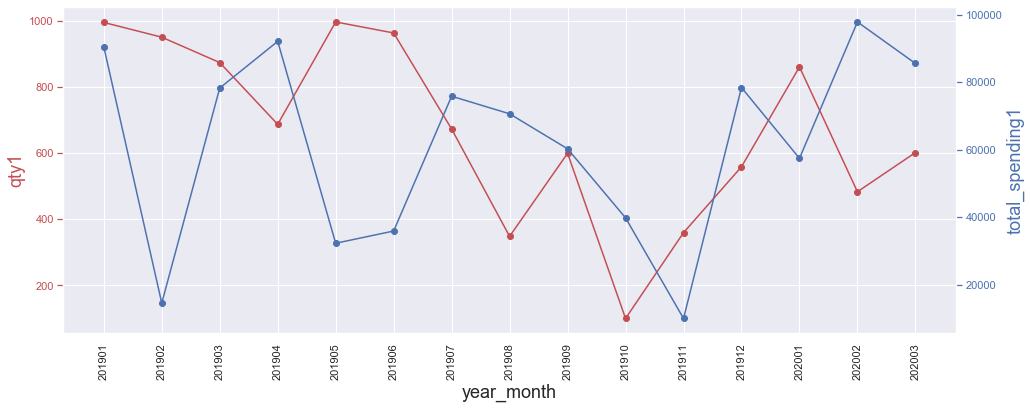

In [38]:
plot_2y_line(df, 'year_month', 'qty1', 'total_spending1')

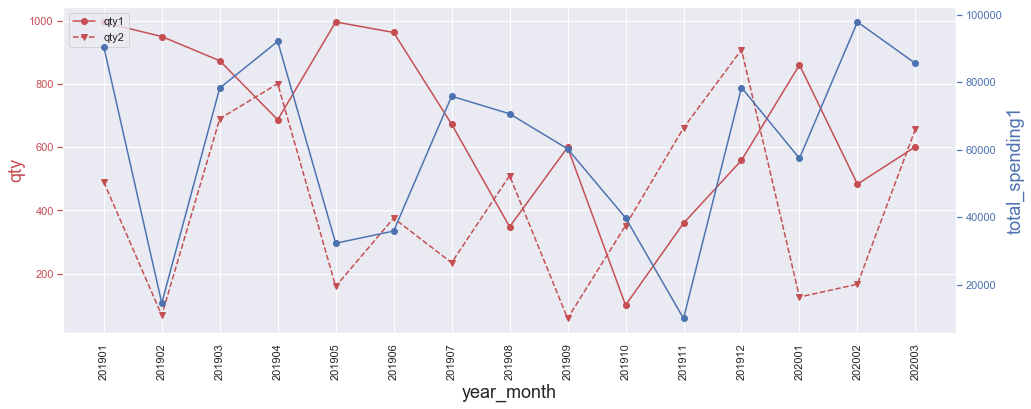

In [39]:
plot_2y_line(df, 'year_month', ['qty1', 'qty2'], 'total_spending1', yl_label='qty')

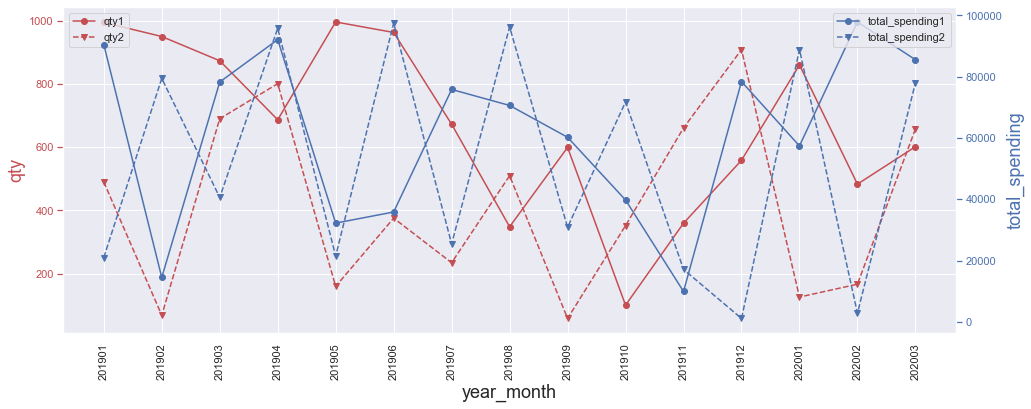

In [40]:
plot_2y_line(df, 'year_month', ['qty1', 'qty2'], ['total_spending1', 'total_spending2'], 
           yl_label='qty', yr_label='total_spending')